In [23]:
%pylab inline

# Import our plot library
from vplot import *

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from matplotlib.patches import Polygon
import scipy.stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

DATADIR="/storage/mgymrek/ssc-imputation/"
OUTPATH="pdfs/"
PREFIX="Figure2"

sscloo = pd.read_csv(os.path.join(DATADIR, "loo","l1o.results_EUR_allelefilter.csv"))
locstats = pd.read_csv(os.path.join(DATADIR, "callstats", "hipstr.chr21.allfilters.tab"), sep="\t")
locstats["str"] = locstats.apply(lambda x: str(x["chrom"])+":"+str(x["start"]), 1)
sscloo = pd.merge(locstats, sscloo, on="str")

Populating the interactive namespace from numpy and matplotlib


# Figure 2B: LOO Concordance vs. Heterozygosity

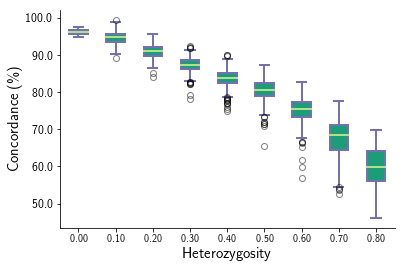

In [51]:
HETBIN=0.1
sscloo["hetbin"] = sscloo["het"].apply(lambda x: int(x/HETBIN)*HETBIN)
hetbins = np.unique(sscloo['hetbin'].values)
fullList = list()
for i in hetbins:
    fullList.append((sscloo[sscloo.hetbin==i]['concord'].values*100))
    
fig = plt.figure()

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(fullList, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Set X-axis labels
#ax.set_xticklabels(np.unique(sscloo['numAllele'].values))

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Set axis tite
ax.set_xlabel("Heterozygosity", size=15);
ax.set_ylabel("Concordance (\%)", size=15);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
def GetLabel(x):
    if int(x*100)%10 == 0: return "%.2f"%x
    else: return ""
ax.set_xticklabels([GetLabel(x) for x in hetbins], size=10)
ax.set_yticklabels([(x) for x in ax.get_yticks()], size=12);

fig.savefig(os.path.join(OUTPATH, "%s_SSCConcVsHet.pdf"%PREFIX))

# Figure 2C Allele-r2 vs. frequency - TODO

# Figure 2D 1KG vs. SSC concordance

0.7656054113211597

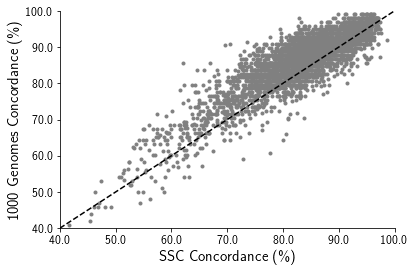

In [112]:
headers = ["pos", "ssc_r", "ssc_concord", "ssc_numAlleles", "ssc_period", "onekg_r", "onekg_concord", "onekg_numAlleles", "onekg_period"]
onekg = pd.read_csv(os.path.join(DATADIR, "onekg", "results.ssc.1kg.allelefilter.txt"),
                 delim_whitespace=True, names=headers  )

fig = plt.figure()
ax=fig.add_subplot(111)
# Plot
ax.scatter(onekg.ssc_concord*100, onekg.onekg_concord*100, marker='.', color="gray")
ax.set_xlabel('SSC Concordance (\%)', size=15)
ax.set_ylabel('1000 Genomes Concordance (\%)', size=15)

ax.plot([40, 100], [40, 100], linestyle="dashed", color="black")
ax.set_xlim(left=40, right=100)
ax.set_ylim(bottom=40, top=100)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xticklabels(ax.get_xticks(), size=12);
ax.set_yticklabels(ax.get_yticks(), size=12);

fig.savefig(os.path.join(OUTPATH, "%s_SSCVs1kgConc.pdf"%PREFIX))
scipy.stats.pearsonr(onekg.ssc_concord, onekg.onekg_concord)[0]**2

# Supplemental: SSC LOO r2 vs. het

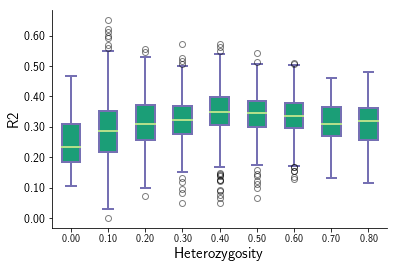

In [59]:
HETBIN=0.1
sscloo["hetbin"] = sscloo["het"].apply(lambda x: int(x/HETBIN)*HETBIN)
hetbins = np.unique(sscloo['hetbin'].values)
fullList = list()
for i in hetbins:
    fullList.append((sscloo[sscloo.hetbin==i]['r'].apply(lambda x: x**2).values))
    
fig = plt.figure()

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(fullList, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Set X-axis labels
#ax.set_xticklabels(np.unique(sscloo['numAllele'].values))

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Set axis tite
ax.set_xlabel("Heterozygosity", size=15);
ax.set_ylabel("R2", size=15);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
def GetLabel(x):
    if int(x*100)%10 == 0: return "%.2f"%x
    else: return ""
ax.set_xticklabels([GetLabel(x) for x in hetbins], size=10)
ax.set_yticklabels(["%.2f"%(x) for x in ax.get_yticks()], size=12);

fig.savefig(os.path.join(OUTPATH, "SuppFig_SSCR2VsHet.pdf"))

# Supplemental: 1kg vs. SSC r2 - TODO use allele-r2?

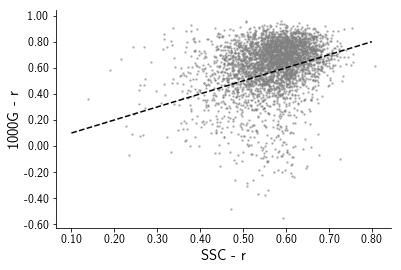

In [100]:
kl_d = pd.read_csv(os.path.join(DATADIR, "onekg","kl_divergence_symm.txt"), delimiter=',', names=['pos','kl'])
kl_d = pd.merge(onekg, kl_d, on="pos")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(kl_d["ssc_r"], kl_d["onekg_r"], color="gray", alpha=0.5, s=2);
ax.plot([0.1, 0.8], [0.1, 0.8], color="black", linestyle="dashed")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("SSC - r", size=15)
ax.set_ylabel("1000G - r", size=15)
ax.set_xticklabels(["%0.2f"%(x) for x in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.2f"%(x) for x in ax.get_yticks()], size=12);

# Table 1 - TODO add EUR/AFR breakdown

In [113]:
ssc = ["SSC - LOO", np.mean(sscloo["concord"]), np.mean(sscloo["r"])]
kg = ["1000G", np.mean(onekg["onekg_concord"]), np.mean(onekg["onekg_r"])]

for data in [ssc, kg, kg_afr]:
    print("\t".join([str(item) for item in data]))

SSC - LOO	0.8368440367769365	0.5658583763188368
1000G	0.8607880090185284	0.614784518107423
1000G	4.575656058068119	0.7672789443598745


# Supplemental: SNP-SNP vs. SNP-STR LD

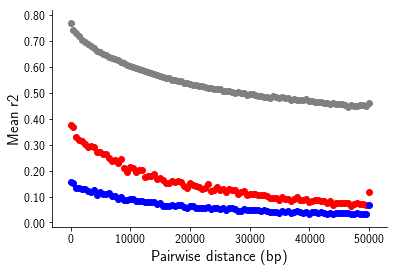

In [2]:
BINSIZE=500
# Load SNPSTR
snpsnp = pd.read_csv(os.path.join(DATADIR, "snpstr-ld", "snp_pairwise_ld_chr21.tab"), sep="\t",
                    names=["distance","r2"])
snpstr = pd.read_csv(os.path.join(DATADIR, "snpstr-ld", "snp_str_ld_chr21.tab"), sep="\t",
                      usecols=[0,1,3,6])
snpstr["chrom"] = snpstr["locus1"].apply(lambda x: x.split(":")[0])
snpstr["start"] = snpstr["locus1"].apply(lambda x: int(x.split(":")[1]))
snpstr["distance"] = snpstr.apply(lambda x: abs(int(x["locus1"].split(":")[1])-int(x["locus2"].split(":")[1])), 1)

# Load SNPSTR - allele
snpstr_a = pd.read_csv(os.path.join(DATADIR, "snpstr-ld", "snp_str_ld_chr21_allele.tab"), sep="\t",
                      usecols=[0,1,2,3,6])
snpstr_a = snpstr_a[~np.isnan(snpstr_a["r2"])]
snpstr_a["chrom"] = snpstr_a["locus1"].apply(lambda x: x.split(":")[0])
snpstr_a["start"] = snpstr_a["locus1"].apply(lambda x: int(x.split(":")[1]))
snpstr_a["distance"] = snpstr_a.apply(lambda x: abs(int(x["locus1"].split(":")[1])-int(x["locus2"].split(":")[1])), 1)

snpstr_best = snpstr.groupby("start", as_index=False).agg({"r2": max, "freq_het": np.mean})
snpstr_best_a = snpstr_a.groupby("start", as_index=False).agg({"r2": max,"freq_het": np.mean})

snpsnp["distbin"] = (snpsnp["distance"]/BINSIZE).apply(int)
snpsnp_bins = snpsnp.groupby("distbin", as_index=False).agg({"r2": np.mean})

snpstr["distbin"] = (snpstr["distance"].apply(abs)/BINSIZE).apply(int)
snpstr_bins = snpstr.groupby("distbin", as_index=False).agg({"r2": np.mean})

snpstr_a["distbin"] = (snpstr_a["distance"].apply(abs)/BINSIZE).apply(int)
snpstr_a_bins = snpstr_a.groupby("distbin", as_index=False).agg({"r2": np.mean})


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(snpsnp_bins["distbin"]*BINSIZE, snpsnp_bins["r2"], color="gray");
ax.scatter(snpstr_bins["distbin"]*BINSIZE, snpstr_bins["r2"], color="red");
ax.scatter(snpstr_a_bins["distbin"]*BINSIZE, snpstr_a_bins["r2"], color="blue");

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("Pairwise distance (bp)", size=15)
ax.set_ylabel("Mean r2", size=15)
ax.set_xticklabels([int(x) for x in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.2f"%(x) for x in ax.get_yticks()], size=12);

fig.savefig(os.path.join(OUTPATH, "SuppFig_SnpStrLD.pdf"))